# Линейная регрессия

**Выполнил Мелехин Николай Сергеевич**

Решение задачи регрессии в scikit-learn с помощью линейной модели - линейная регрессия

- Обучение класса SGDRegressor и анализ атрибутов
- Анализ модели для разных данных
- Предобразование целевой переменной с помощью класса TransformedTargetRegressor
- Сохранение модели

## Установка и импорт библиотек

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install plotly
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

from sklearn.compose import TransformedTargetRegressor # ддля обрабоки целевой переменной

import warnings
warnings.filterwarnings('ignore')

# Описание датасета

'index': Индекс записи

'Publishing Year': Год когда книга опубликована

'Book Name': Название книги

'Author': Автор

'language_code': Язык книги

'Author_Rating': Рейтинг автора

'Book_average_rating': Средний рейтинг книги

'Book_ratings_count':  Количество данных рейтингов для книги

'genre': Жанр

'gross sales': Валовой объем продаж

'publisher revenue': Прибыль для издателя

'sale price':  Цена книги

'sales rank': Ранг продаж для книги

'Publisher': Издатель

'units sold': Количество проданных копий

Ссылка на датасет: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

Целью данной работы будет нахождением зависимости между различными факторами книги и результативным фактором - валовым объемом продаж.

In [3]:
df = pd.read_csv('Books_Data_Clean.csv')  # Считываем файл в DataFrame
df.head(5)  # Посмотрим первые пять записей

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [5]:
df['language_code'].fillna('eng', inplace = True)  # Заменим пропуски на самое часто встречающее значение - eng
#Удалим дубликаты - индекс и название книги
df = df.drop(['index', 'Book Name'], axis=1)
#Удалим результативные признаки - количество проданных копий, прибыль издателя, рейтинг продаж
df = df.drop(['units sold', 'publisher revenue', 'sales rank'], axis=1)

In [6]:
ancient_books = df.loc[(df['Publishing Year']<0)] #Посмотрим на древние книги
ancient_books

,Publishing Year,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,sale price,Publisher
241,-380.0,"Plato, Desmond Lee",eng,Intermediate,3.90,110274,genre fiction,387.09,0.99,"Amazon Digital Services, Inc."
293,-430.0,"Sophocles, J.E. Thomas",eng,Intermediate,3.67,119496,genre fiction,2460.92,7.99,Hachette Book Group
568,-300.0,"Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...",eng,Excellent,4.31,39863,genre fiction,665.55,4.59,Penguin Group (USA) LLC
589,-560.0,"Aesop, Laura Harris, Laura Gibbs",eng,Excellent,4.05,88508,genre fiction,693.61,4.99,"Amazon Digital Services, Inc."
749,-17.0,"Virgil, Robert Fitzgerald",eng,Intermediate,3.81,75051,genre fiction,114.84,0.99,"Amazon Digital Services, Inc."
990,-441.0,"Sophocles, J.E. Thomas",eng,Intermediate,3.60,67608,genre fiction,106.92,0.99,"Amazon Digital Services, Inc."


In [7]:
df = df.drop(index=[241,293,568,589,749,990]) #Удалим древние книги

In [8]:
#Заменим год на возраст
df['Publishing Year'] = 2024 - df['Publishing Year']
df.rename(columns = {'Publishing Year':'Age'}, inplace = True )

In [9]:
df.info()  # Выведем краткую сводку по датафрейму

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1063 non-null   float64
 1   Author               1064 non-null   object 
 2   language_code        1064 non-null   object 
 3   Author_Rating        1064 non-null   object 
 4   Book_average_rating  1064 non-null   float64
 5   Book_ratings_count   1064 non-null   int64  
 6   genre                1064 non-null   object 
 7   gross sales          1064 non-null   float64
 8   sale price           1064 non-null   float64
 9   Publisher            1064 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 91.4+ KB


In [10]:
df = df.dropna(subset='Age') #Удалим пустые значения

In [11]:
df.info() #Пустые значенния отсутствуют

<class 'pandas.core.frame.DataFrame'>
Index: 1063 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1063 non-null   float64
 1   Author               1063 non-null   object 
 2   language_code        1063 non-null   object 
 3   Author_Rating        1063 non-null   object 
 4   Book_average_rating  1063 non-null   float64
 5   Book_ratings_count   1063 non-null   int64  
 6   genre                1063 non-null   object 
 7   gross sales          1063 non-null   float64
 8   sale price           1063 non-null   float64
 9   Publisher            1063 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 91.4+ KB


## Числовые и категориальные признаки

Из предварительной обработки исключена колонка gross sales(поскольку она является целевой)

In [12]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [13]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [14]:
# Pipeline для числовых признаков

num_pipe_num = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01, )),
    ('norm', MinMaxScaler())
])
 
num = ['Age', 'Book_average_rating', 'Book_ratings_count', 'sale price']

# И для категориальных признаков

cat_pipe_Status_Touch = Pipeline([
    ('encoder', OrdinalEncoder())
])


cat_Status_Touch = ['Author_Rating', 'genre']

cat_pipe = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat = ['Author_Rating', 'Author', 'language_code', 'genre', 'Publisher']


# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num', num_pipe_num, num),
])


# И полный Pipeline со всеми признаками
preprocessors_All = ColumnTransformer(transformers=[
    ('norm', num_pipe_num, num),
    ('Status_Touch', cat_pipe_Status_Touch, cat_Status_Touch),
    ('cat', cat_pipe, cat)
])

In [15]:
columns_num = np.hstack([num])

# Линейная Регрессия

In [16]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.model_selection import train_test_split  # Функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit  # При кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate  # Функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse  # Метрика MSE от Scikit-learn
from sklearn.metrics import r2_score  # Коэффициент детерминации R2 от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay  # Класс визуализации ошибок модели

In [17]:
# Не забываем удалить целевую переменную цену из признаков
X,y = df.drop(columns = ['gross sales']), df['gross sales']

# Разбиваем датасет на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [18]:
X_train  # Посмотрим содержимое обучающей выборки

,Age,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,sale price,Publisher
348,118.0,"Upton Sinclair, Earl Lee, Kathleen DeGrave",eng,Intermediate,3.72,97468,genre fiction,5.99,Random House LLC
5,9.0,Victoria Aveyard,eng,Intermediate,4.08,83354,genre fiction,4.99,"Amazon Digital Services, Inc."
312,12.0,E.L. James,eng,Excellent,4.13,76876,genre fiction,4.99,"Amazon Digital Services, Inc."
502,24.0,"Lemony Snicket, Brett Helquist",eng,Intermediate,3.91,118624,genre fiction,0.99,"Amazon Digital Services, Inc."
104,33.0,"Jostein Gaarder, Paulette MÃ¸ller",eng,Intermediate,3.88,109692,genre fiction,10.65,Penguin Group (USA) LLC
...,...,...,...,...,...,...,...,...,...
332,36.0,"Sam McBratney, Anita Jeram",en-US,Excellent,4.36,104690,genre fiction,2.99,"Amazon Digital Services, Inc."
469,12.0,Leigh Bardugo,eng,Excellent,4.05,135225,fiction,3.99,"Amazon Digital Services, Inc."
121,18.0,Charlaine Harris,en-US,Intermediate,4.02,163054,genre fiction,7.50,Simon and Schuster Digital Sales Inc
1051,63.0,Richard Yates,eng,Intermediate,3.89,56550,genre fiction,6.94,Penguin Group (USA) LLC


# Оценим модель с использованием только числовых признаков

In [19]:
#  На тренировочных данных делаем fit_transform - одновременно и обучаемся, и преобразуем тренировочные данные
X_train_prep = preprocessors_num.fit_transform(X_train)
# После на валидационных данных делаем уже только transform - преобразуем данные согласно ранее запомненным параметрам, полученным на тренировочной выборке
X_val_prep = preprocessors_num.transform(X_val)

### Обучаем модель

In [20]:
model = SGDRegressor(random_state = 42)  # Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. 
                                         # Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь 
                                         # одни и те же значения при каждом вызове.

model.fit(X_train_prep, y_train);  # Обучаем модель на тренировочной выборке

## Подготовим несколько функций для анализа обученной модели

Извлечение коэффициентов из модели

In [21]:
def get_coefs(model):  # model: наша обученная модель

    B0 = model.intercept_[0]
    B = model.coef_
    return B0, B

In [22]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

## Визуализации весов в виде столбчатых диаграмм

In [23]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers]  # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Напишем уравнение модели

In [24]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
-1290.538-141.69*Age-563.94*Book_average_rating+6392.91*Book_ratings_count+4136.88*sale price


### Визуализируем веса в виде столбчатых диаграмм

In [25]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Признаки sale price (цена книги) и book_ratings_count (количество рейтингов) имеют наибольшие коэффициенты, следовательно они больше всего влияют на целевой показатель - объем продаж. Также признак Book_average_rating имеет отрицательный коэффициент - это означает, что книги с более высоким средним рейтингом не обязательно будут продаваться лучше чем не с высоким. Возраст книги на продажи значительно не влияет.

### Оценка метрик

In [26]:
def calculate_metric(model_pipe, X, y, metric = r2_score, **kwargs):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model, **kwargs)

In [27]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.2074
r2 на валидационной выборке: 0.2656
mse на тренировочной выборке: 11143418.7838
mse на валидационной выборке: 14024424.9924
rmse на тренировочной выборке: 3338.1760
rmse на валидационной выборке: 3744.9199


## Кросс-валидация

In [28]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [29]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [30]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.008000,0.001001,0.223954,-1.609333e+07,-1623.488752,-29735.690892
1,0.004999,0.001001,0.053837,-8.007060e+06,-1266.599944,-21661.076796
2,0.007004,0.002000,0.235657,-1.413006e+07,-1742.447023,-21691.541356
3,0.005996,0.000998,0.122629,-1.572010e+07,-1482.498217,-26024.056278
4,0.006001,0.002000,0.123225,-7.900328e+06,-1215.664306,-21642.270884




test_R2      1.518606e-01
test_-MSE   -1.237018e+07
test_-MAE   -1.466140e+03
test_-Max   -2.415093e+04
dtype: float64


### Визуализация ошибок от scikit-learn

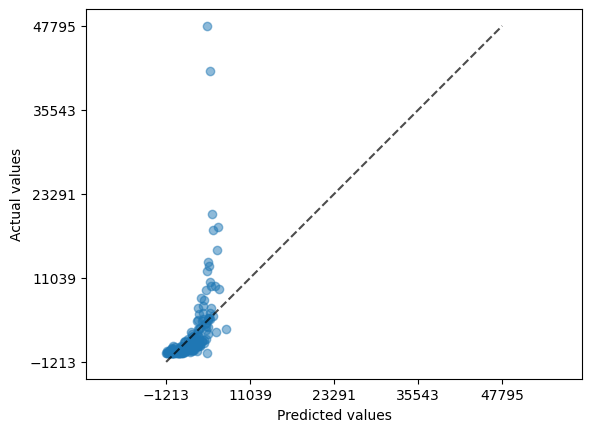

In [31]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Используя только 4 числовых признака можно неплохо предсказывать объем продаж

* Проблемы с предсказанием высоких объемов продаж

* Увеличение количества рейтингов, цены книги положительно сказывается на объеме продаж, рейтинга книги и возраста - отрицательно

## Объединяем Pipeline Предобработки и Модель

In [32]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

In [33]:
pipe_num['model']

SGDRegressor(random_state=42)

In [34]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price'])])),
                ('model', SGDRegressor(random_state=42))])

In [35]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-1290.538-141.69*Age-563.94*Book_average_rating+6392.91*Book_ratings_count+4136.88*sale price


In [36]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.2074
r2 на валидационной выборке: 0.2656
mse на тренировочной выборке: 11143418.7838
mse на валидационной выборке: 14024424.9924
rmse на тренировочной выборке: 3338.1760
rmse на валидационной выборке: 3744.9199


In [37]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.016999,0.005000,0.235203,-1.586006e+07,-1631.601798,-29448.631557
1,0.015000,0.004000,0.056514,-7.984409e+06,-1272.105494,-21592.451535
2,0.016000,0.005000,0.483405,-9.550062e+06,-1633.946725,-15260.793207
3,0.013000,0.005000,0.129071,-1.560468e+07,-1472.812635,-25940.006929
4,0.014004,0.004996,-0.032372,-9.302359e+06,-1413.090348,-22339.037590




test_R2      1.743642e-01
test_-MSE   -1.166031e+07
test_-MAE   -1.484711e+03
test_-Max   -2.291618e+04
dtype: float64


Настоящие значения:

test_R2      0.1743642

test_-MSE   -11660310

test_-MAE   -1484.711

test_-Max   -22916.18

## Оценим влияние предварительной обработки целевой переменной

In [38]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [39]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [40]:
B0, B = get_coefs(pipe_num_transform['model'].regressor_)
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-1.130+0.08*Age-0.25*Book_average_rating+1.87*Book_ratings_count+2.16*sale price


In [41]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Влияние Book_rating_count уступило влиянию sale price, возраст поменялся по модулю, остальные соотношения сильно не изменились.

In [42]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.014995,0.005999,0.111665,-1.842195e+07,-1192.068811,-31878.062156
1,0.014999,0.005000,0.110275,-7.529447e+06,-813.292789,-21096.035345
2,0.014000,0.005005,0.325861,-1.246251e+07,-1242.968902,-18245.788947
3,0.013001,0.004998,0.105141,-1.603343e+07,-1032.593477,-25602.189218
4,0.014002,0.004998,0.061604,-8.455573e+06,-996.925452,-21121.274798




test_R2      1.429092e-01
test_-MSE   -1.258058e+07
test_-MAE   -1.055570e+03
test_-Max   -2.358867e+04
dtype: float64


Настоящие значения:

test_R2      0.14

test_-MSE   -12580580

test_-MAE   -1055.570

test_-Max   -23588.67

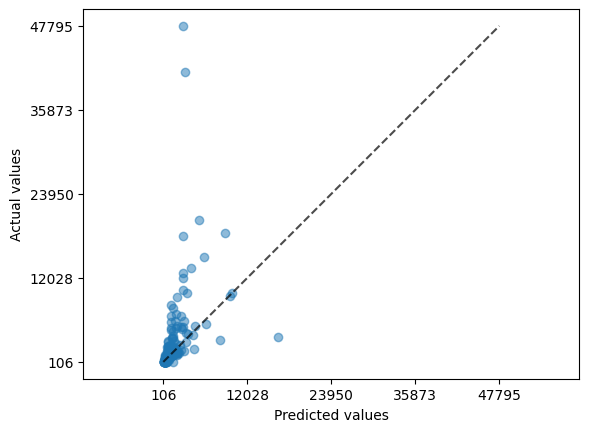

In [43]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Предварительная обработка целевой переменной не улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.14 против 0.17)

* В целом предварительная обработка целевой переменной сделала хуже предсказание высоких значений продаж

* В области низких продаж предсказание немного улучшилось



# Оценим влияние категориальных признаков

In [44]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_All),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [45]:
pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price']),
                                                 ('Status_Touch',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Author_Rating', 'genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Author_Rating', 'Author',
                                                   'language_code', 'genre',
                                                   'Publisher'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [46]:
cat_Status_Touch_names = pipe_all_transform['preprocessors'].transformers_[1][
    1]['encoder'].get_feature_names_out(cat_Status_Touch)
cat_names = pipe_all_transform['preprocessors'].transformers_[2][1][
    'encoder'].get_feature_names_out(cat)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num, cat_Status_Touch, cat])

In [47]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
-0.410+0.02*Age+0.33*Book_average_rating+1.74*Book_ratings_count+1.83*sale price+0.04*Author_Rating-0.24*genre-0.30*Author_Rating-0.22*Author+0.08*language_code+0.04*genre+0.02*Publisher


In [48]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [49]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.08, width = 1800)

In [50]:
cat_names  # Можно посмотреть, что скрывается за индексами

array(['Author_Rating_Excellent', 'Author_Rating_Famous',
       'Author_Rating_Intermediate', 'Author_Rating_Novice',
       'Author_A.S.A. Harrison', 'Author_Adam Johnson',
       'Author_Adam Mansbach, Ricardo CortÃ©s', 'Author_Agatha Christie',
       'Author_Agatha Christie, Î¡Î¿Î¶Î¯Ï„Î± Î£ÏŽÎºÎ¿Ï…',
       'Author_Alan Bradley', 'Author_Alan Brennert',
       'Author_Albert Camus, Stuart Gilbert', 'Author_Alex Flinn',
       'Author_Alex Garland', 'Author_Alex Haley',
       'Author_Alexandra Bracken', 'Author_Alice Clayton',
       'Author_Alice Sebold',
       'Author_Allen Ginsberg, William Carlos Williams',
       'Author_Allie Brosh', 'Author_Ally Carter', 'Author_Ally Condie',
       'Author_Amanda Hocking', 'Author_Amor Towles', 'Author_Amy Tan',
       'Author_Anita Diamant', 'Author_Anita Shreve',
       'Author_Ann Patchett', 'Author_Anna Quindlen',
       'Author_Anne McCaffrey, Teodor PanasiÅ„ski', 'Author_Anne Rice',
       'Author_Anne Tyler, Jennifer Bassett', 'Aut

In [51]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.2476
r2 на валидационной выборке: 0.2436
mse на тренировочной выборке: 10577820.5436
mse на валидационной выборке: 14444524.2334
rmse на тренировочной выборке: 3252.3562
rmse на валидационной выборке: 3800.5952


In [52]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 73))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.063999,0.009000,0.363556,-1.785623e+06,-573.974654,-7229.615952
1,0.052999,0.009001,-0.021092,-9.311203e+06,-1183.822534,-20905.215625
2,0.063000,0.009000,0.692457,-1.581797e+06,-581.628909,-5141.675714
3,0.058998,0.009001,0.191198,-7.035212e+06,-846.452771,-16240.835177
4,0.057997,0.008001,0.427717,-1.131034e+06,-418.469603,-7269.709562




test_R2      3.307670e-01
test_-MSE   -4.168974e+06
test_-MAE   -7.208697e+02
test_-Max   -1.135741e+04
dtype: float64


Настоящие значения:

test_R2      0.3307670

test_-MSE   -4168974

test_-MAE   -720.8697

test_-Max   -11357.41


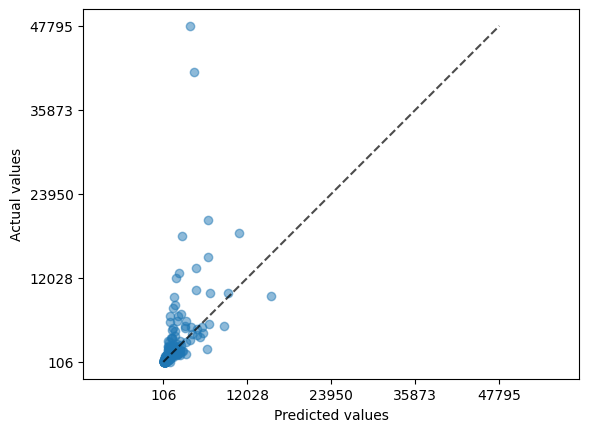

In [53]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Выводы по модели:

* Добавление категориальных признаков значительно улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.33 против 0.17)

* Более высокие продажи предсказываются лучше, но ещё есть проблемы

* Наиболее значимыми оказались числовые признаки: цена книги и число рейтингов.

